In [112]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
#import data
penguin_size_df = pd.read_csv("data/penguins_size.csv")
penguin_size_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [114]:
df = penguin_size_df[['species', 'sex', 'body_mass_g']]

In [115]:
df_filtered = df[ (df['species']=='Adelie') & (df['sex']=='MALE')]
df_filtered 

,species,sex,body_mass_g
0,Adelie,MALE,3750.0
5,Adelie,MALE,3650.0
7,Adelie,MALE,4675.0
13,Adelie,MALE,3800.0
14,Adelie,MALE,4400.0
...,...,...,...
143,Adelie,MALE,3725.0
145,Adelie,MALE,3650.0
146,Adelie,MALE,4250.0
149,Adelie,MALE,3750.0


In [116]:
adelie_male_mass = df_filtered ['body_mass_g'].reset_index()
adelie_male_mass

,index,body_mass_g
0,0,3750.0
1,5,3650.0
2,7,4675.0
3,13,3800.0
4,14,4400.0
...,...,...
68,143,3725.0
69,145,3650.0
70,146,4250.0
71,149,3750.0


## Pandas BoxPlot

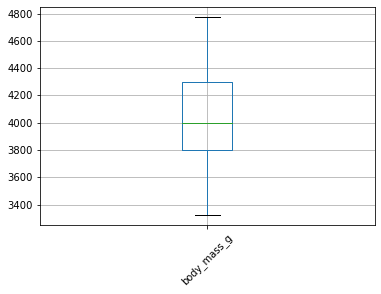

In [117]:
# can not modify the pandas whisker settings
mass_boxplot = adelie_male_mass.boxplot(column='body_mass_g') 
plt.xticks(rotation = 45);

## Dataset Min/Max

In [128]:
print(f"Max value: {max(list(adelie_male_mass['body_mass_g']))}")
print(f"Min value: {min(list(adelie_male_mass['body_mass_g']))}")

Max value: 4775.0
Min value: 3325.0


## Matplotlib Box plot

(2500.0, 5000.0)

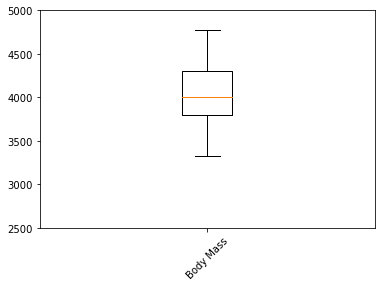

In [140]:
ax0 = plt.boxplot(adelie_male_mass['body_mass_g'], labels = ["Body Mass"])
plt.xticks(rotation = 45);
plt.ylim(2500, 5000);

## Whisker Locations

In [130]:
ax0

{'whiskers': [<matplotlib.lines.Line2D at 0x1cdc75f06a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cdc48098e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cdc471c8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cdc4f448e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cdc720e160>],
 'means': []}

In [131]:
capbottom = ax0['caps'][0].get_ydata()[0]
captop = ax0['caps'][1].get_ydata()[0]

print(f"The bottom whisker is located at y={capbottom}")
print(f"The top whisker is located at y={captop}")

The bottom whisker is located at y=3325.0
The top whisker is located at y=4775.0


## Calculated Whisker locations

In [148]:
lower_quarter, median, upper_quarter = adelie_male_mass['body_mass_g'].quantile(q=[0.25, 0.5, 0.75] )


In [133]:
IQR = upper_quarter - lower_quarter
my_whis = 1.5
calc_lower_whisker = lower_quarter - my_whis*IQR
calc_upper_whisker = upper_quarter + my_whis*IQR
print(f"The calculated lowerbounds is located at y={calc_lower_whisker}")
print(f"The calculated upperbounds is located at y={calc_upper_whisker}")

The calculated lowerbounds is located at y=3050.0
The calculated upperbounds is located at y=5050.0


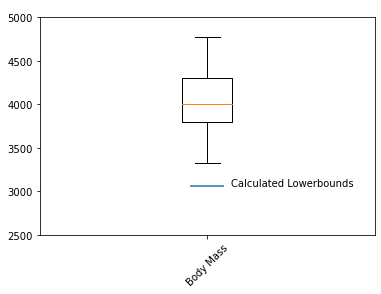

In [141]:
ax1 = plt.boxplot(adelie_male_mass['body_mass_g'], labels = ["Body Mass"])
plt.hlines(y=calc_lower_whisker, xmin=0.95, xmax=1.05)
plt.hlines(y=calc_upper_whisker, xmin=0.95, xmax=1.05)
plt.annotate("Calculated Upperbounds", (1.07,calc_upper_whisker))
plt.annotate("Calculated Lowerbounds", (1.07,calc_lower_whisker))
plt.xticks(rotation = 45);
plt.ylim(2500, 5000);

In [135]:
print("Summary")
print(f"The datset min value: {min(list(adelie_male_mass['body_mass_g']))}")
print(f"The calculated lowerbounds is located at y={calc_lower_whisker}")
print(f"The bottom whisker is located at y={capbottom}")
print()
print(f"The datset max value: {max(list(adelie_male_mass['body_mass_g']))}")
print(f"The calculated upperbounds is located at y={calc_upper_whisker}")
print(f"The top whisker is located at y={captop}")


Summary
The datset min value: 3325.0
The calculated lowerbounds is located at y=3050.0
The bottom whisker is located at y=3325.0

The datset max value: 4775.0
The calculated upperbounds is located at y=5050.0
The top whisker is located at y=4775.0


## Insert value just within calculated lowerbounds

The datset min value: 3085.0
The calculated lowerbounds is at y=3059.375
The bottom whisker is located at y=3085.0

The datset max value: 4775.0
The calculated upperbounds is at y=5034.375
The top whisker is located at y=4775.0


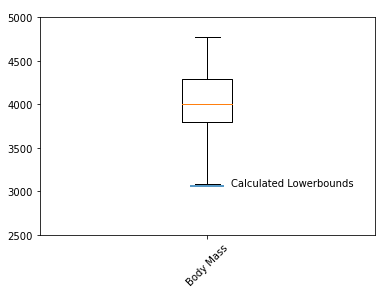

In [142]:
value = pd.Series(3085)
masses = adelie_male_mass['body_mass_g'].append(value)

lower_quarter, median, upper_quarter = masses.quantile(q=[0.25, 0.5, 0.75] )

IQR = upper_quarter - lower_quarter
my_whis = 1.5
calc_lower_whisker = lower_quarter - my_whis*IQR
calc_upper_whisker = upper_quarter + my_whis*IQR

ax1 = plt.boxplot(masses, labels = ["Body Mass"])
plt.hlines(y=calc_lower_whisker, xmin=0.95, xmax=1.05)
plt.hlines(y=calc_upper_whisker, xmin=0.95, xmax=1.05)
plt.annotate("Calculated Upperbounds", (1.07,calc_upper_whisker))
plt.annotate("Calculated Lowerbounds", (1.07,calc_lower_whisker))
plt.xticks(rotation = 45);
plt.ylim(2500, 5000);

capbottom = ax1['caps'][0].get_ydata()[0]
captop = ax1['caps'][1].get_ydata()[0]


print(f"The datset min value: {min(list(masses))}")
print(f"The calculated lowerbounds is at y={calc_lower_whisker}")
print(f"The bottom whisker is located at y={capbottom}")
print()
print(f"The datset max value: {max(list(masses))}")
print(f"The calculated upperbounds is at y={calc_upper_whisker}")
print(f"The top whisker is located at y={captop}")

The datset min value: 2700.0
The calculated lowerbounds is at y=3059.375
The bottom whisker is located at y=3325.0

The datset max value: 4775.0
The calculated upperbounds is at y=5034.375
The top whisker is located at y=4775.0


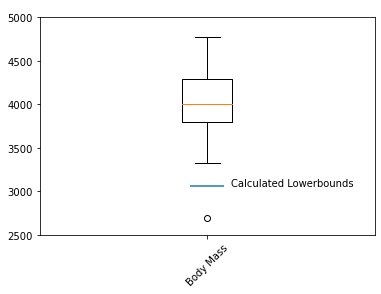

In [143]:
value = pd.Series(2700)
masses_low = adelie_male_mass['body_mass_g'].append(value)

lower_quarter, median, upper_quarter = masses_low.quantile(q=[0.25, 0.5, 0.75] )

IQR = upper_quarter - lower_quarter
my_whis = 1.5
calc_lower_whisker = lower_quarter - my_whis*IQR
calc_upper_whisker = upper_quarter + my_whis*IQR

ax2 = plt.boxplot(masses_low, labels = ["Body Mass"])
plt.hlines(y=calc_lower_whisker, xmin=0.95, xmax=1.05)
plt.hlines(y=calc_upper_whisker, xmin=0.95, xmax=1.05)
plt.annotate("Calculated Upperbounds", (1.07,calc_upper_whisker))
plt.annotate("Calculated Lowerbounds", (1.07,calc_lower_whisker))
plt.xticks(rotation = 45);
plt.ylim(2500, 5000);

capbottom = ax2['caps'][0].get_ydata()[0]
captop = ax2['caps'][1].get_ydata()[0]


print(f"The datset min value: {min(list(masses_low))}")
print(f"The calculated lowerbounds is at y={calc_lower_whisker}")
print(f"The bottom whisker is located at y={capbottom}")
print()
print(f"The datset max value: {max(list(masses_low))}")
print(f"The calculated upperbounds is at y={calc_upper_whisker}")
print(f"The top whisker is located at y={captop}")

## Matplotlib with Wiskers at 0.8 versus 1.5

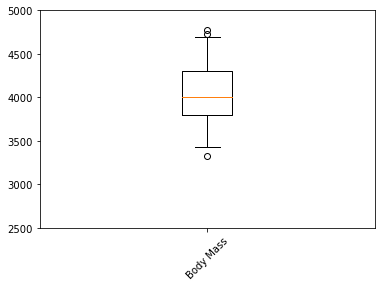

In [144]:
ax2 = plt.boxplot(adelie_male_mass['body_mass_g'], labels = ["Body Mass"], whis=0.80)
plt.xticks(rotation = 45);
plt.ylim(2500, 5000);

In [71]:
capbottom = ax2['caps'][0].get_ydata()[0]
captop = ax2['caps'][1].get_ydata()[0]

print(f"The bottom whisker is located at y={capbottom}")
print(f"The top whisker is located at y={captop}")

The bottom whisker is located at y=3425.0
The top whisker is located at y=4700.0
